# Proyecto

*   Statistical Learning I
*   Elaborado por Yurandir Santana

## Fase I - Problema

El problema a resolver es la **segmentación de clientes** en una tienda minorista basado en el análisis de una base de datos que contiene datos transaccionales.

**El objetivo es identificar grupos de clientes con características similares que permitan comprender mejor su comportamiento de compra.** Al realizar esta segmentación, se espera obtener información valiosa que pueda ser utilizada para adaptar estrategias de marketing, promociones y gestión de inventario de manera más efectiva para cada segmento de clientes.

## Fase II - Fuente de datos

La fuente de datos utilizada en este proyecto fue Superstore de Tableau, la cual suele ser un conjunto de datos de ejemplo ampliamente utilizado para fines de análisis y visualización, especialmente en el ámbito educativo.

Así mismo, es importante destacar que el enfoque y las técnicas utilizadas en este proyecto son aplicables a datos reales de transacciones de una tienda minorista, lo que lo convierte un análisis extrapolable.

La fuente de datos puede ser descargada en el siguiente enlace: [Superstore_Database](https://www.tableau.com/es-es/solutions/gallery/superstore).

## Fase III - Buscar Modelos

El análisis se base en el uso del modelo de *K-means*, dado que ofrece varias ventajas a la hora de realizar una segmentación de clientes.

K-means es un algoritmo de clustering ampliamente popular debido a la facilidad de su implementación, es un modelo eficiente en términos de recursos computacionales y es adecuado para grandes conjuntos de datos. Por último, K-means es un modelo no supervisado, lo que significa que no requiere etiquetas previas o conocimiento del resultado esperado, lo cual es beneficioso en el análisis de datos no estructurados o exploratorio lo que lo hace idóneo considerando el contexto de aplicación y las características de la base de datos utilizada en el presente proyecto.

### Importación de Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from matplotlib.ticker import NullFormatter
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline

### Carga de Fuente de datos

In [ ]:
# El enlace dirige a la data almacenada en Github

url = 'https://github.com/yurandirsantana/UGalileo2023/raw/MainBranch/Statistical%20Learning%201/Proyecto%20Final/Sample%20-%20Superstore.csv'
df = pd.read_csv(url)

### Exploración y análisis de datos


In [ ]:
# Exploración

primeros_cinco_registros = df.head(5)
print(primeros_cinco_registros)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
# Eliminación de columnas innecesarias para el análisis

columnas_innecesarias = ['Discount', 'Profit', 'Order ID', 'Ship Date',
                         'Ship Mode','Region','Sub-Category','Quantity','State','Postal Code','Customer Name','Country', 'Product Name']

DATABASE = df.drop(columnas_innecesarias, axis=1)

# Verificar el DataFrame resultante

print(DATABASE.head())

   Row ID  Order Date Customer ID    Segment             City  \
0       1   11/8/2016    CG-12520   Consumer        Henderson   
1       2   11/8/2016    CG-12520   Consumer        Henderson   
2       3   6/12/2016    DV-13045  Corporate      Los Angeles   
3       4  10/11/2015    SO-20335   Consumer  Fort Lauderdale   
4       5  10/11/2015    SO-20335   Consumer  Fort Lauderdale   

        Product ID         Category     Sales  
0  FUR-BO-10001798        Furniture  261.9600  
1  FUR-CH-10000454        Furniture  731.9400  
2  OFF-LA-10000240  Office Supplies   14.6200  
3  FUR-TA-10000577        Furniture  957.5775  
4  OFF-ST-10000760  Office Supplies   22.3680  


In [ ]:
num_filas = DATABASE.shape[0]
num_columnas = DATABASE.shape[1]

print(f"El DataFrame 'DATABASE' tiene {num_filas} filas y {num_columnas} columnas.")

El DataFrame 'DATABASE' tiene 9994 filas y 8 columnas.


In [ ]:
# Verificación de valores únicos

unique_Segment = DATABASE['Segment'].unique()
unique_category = DATABASE['Category'].unique()
num_unique_values = DATABASE['Product ID'].nunique()

print(unique_Segment)
print(unique_category)

print("Número de valores únicos en la columna 'Product ID':", num_unique_values)

['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
Número de valores únicos en la columna 'Product ID': 1862


#### Análisis de datos

##### Porcentaje de transacciones por segmento

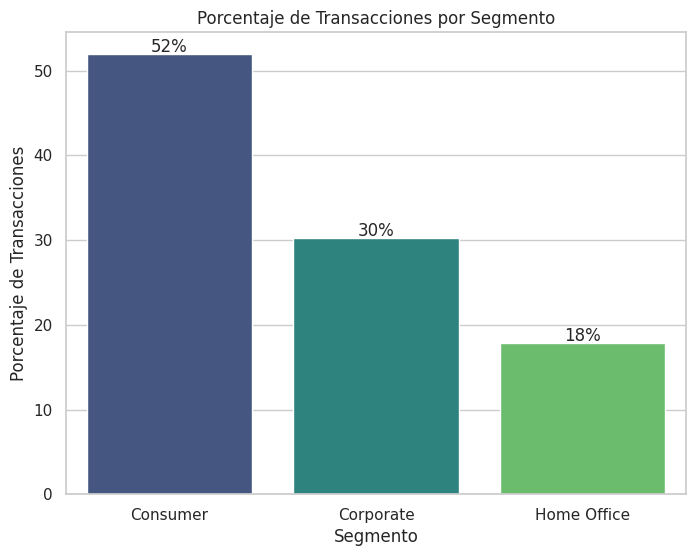

In [ ]:
# Calcular el total de transacciones
total_transactions = DATABASE.shape[0]

# Calcular el número de transacciones por segmento
segment_counts = DATABASE['Segment'].value_counts()

# Calcular el porcentaje de transacciones para cada segmento
percentage_segment = (segment_counts / total_transactions) * 100

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_segment.index, y=percentage_segment.values, palette="viridis")

# Agregar etiquetas en las barras con el porcentaje
for p in ax.patches:
    value = "{:.0f}%".format(p.get_height())
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.xlabel("Segmento")
plt.ylabel("Porcentaje de Transacciones")
plt.title("Porcentaje de Transacciones por Segmento")

plt.show()

##### Porcentaje de transacciones por categoría

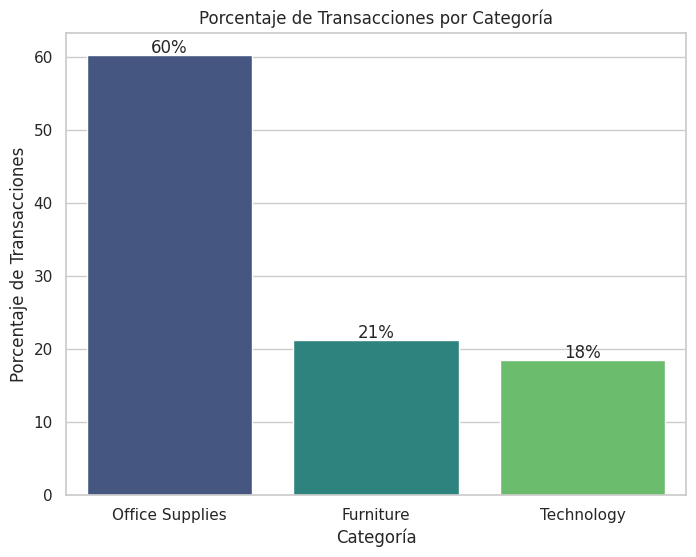

In [ ]:
# Calcular el total de transacciones
total_transactions = DATABASE.shape[0]

# Calcular el número de transacciones por categoría
category_counts = DATABASE['Category'].value_counts()

# Calcular el porcentaje de transacciones para cada categoría
percentage_category = (category_counts / total_transactions) * 100

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_category.index, y=percentage_category.values, palette="viridis")

# Agregar etiquetas en las barras con el porcentaje
for p in ax.patches:
    value = "{:.0f}%".format(p.get_height())
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.xlabel("Categoría")
plt.ylabel("Porcentaje de Transacciones")
plt.title("Porcentaje de Transacciones por Categoría")

plt.show()

##### Porcentaje de transacciones en el Top 5 de Ciudades

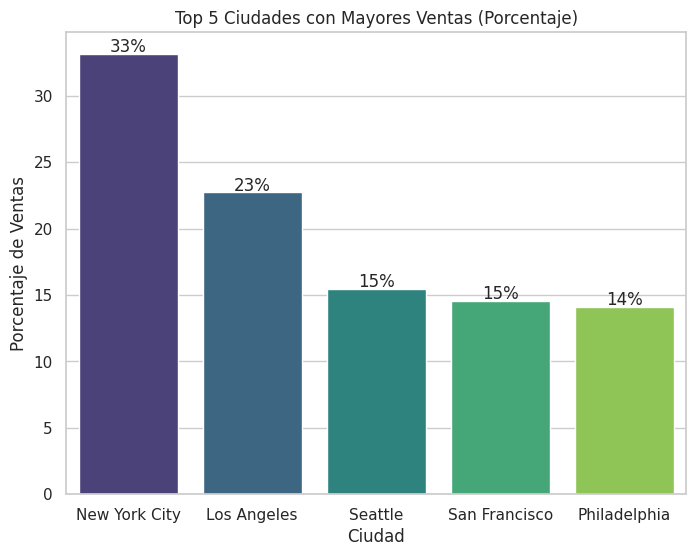

In [ ]:
# Calcular el total de ventas
total_sales = top_cities.sum()

# Calcular el porcentaje de ventas para cada ciudad
percentage_sales = (top_cities / total_sales) * 100

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_cities.index, y=percentage_sales.values, palette="viridis")

# Agregar etiquetas en las barras con el porcentaje
for p in ax.patches:
    value = "{:.0f}%".format(p.get_height())
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.xlabel("Ciudad")
plt.ylabel("Porcentaje de Ventas")
plt.title("Top 5 Ciudades con Mayores Ventas (Porcentaje)")

plt.show()

##### Desarrollo de Modelo **K-Means**

###### Identificación de número de clusters

**Método de la Silueta:**

In [ ]:
# Selección de columnas relevantes

features = ['Segment', 'City', 'Category', 'Sales']

# Aplicación de Filtro

data = DATABASE[features]

# One-hot encoding para variables categóricas

data_encoded = pd.get_dummies(data, columns=['Segment', 'City', 'Category'])

# Escalación de variable numérica

numeric_features = ['Sales']
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Convertir a NumPy array

X = data_encoded.values

# Definir un rango de clusters a evaluar

min_clusters = 5
max_clusters = 15

best_score = -1
best_clusters = None

# Iteración sobre los distintos valores de clusters

for num_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

    # Cluster labels

    cluster_labels = kmeans.fit_predict(X)

    # Evaluación de calidad a través del modelo de silueta

    silhouette_avg = silhouette_score(X, cluster_labels)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_clusters = num_clusters

# Definir el número de clusters a utilizar

print("Número optimo de clusters por el método de la silueta:", best_clusters)

Número optimo de clusters por el método de la silueta: 13


**Método del codo:**

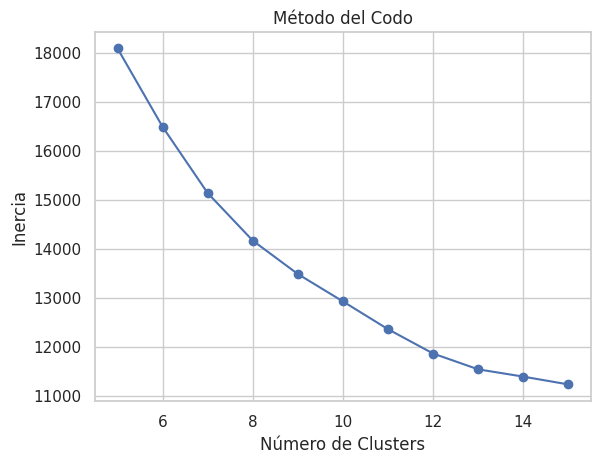

In [ ]:
# Selección de columnas relevantes

features = ['Segment', 'City', 'Category', 'Sales']

# Aplicación de Filtro

data = DATABASE[features]

# One-hot encoding para variables categóricas

data_encoded = pd.get_dummies(data, columns=['Segment', 'City', 'Category'])

# Escalación de variable numérica

numeric_features = ['Sales']
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Convertir a NumPy array

X = data_encoded.values

# Definir un rango de clusters a evaluar

min_clusters = 5
max_clusters = 15

# Inicializar una lista para almacenar las inercias

inertias = []

# Iteración sobre los distintos valores de clusters

for num_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

    # Entrenamiento del modelo

    kmeans.fit(X)

    # Inercia del modelo

    inertia = kmeans.inertia_
    inertias.append(inertia)

# Grafica de la curva

plt.plot(range(min_clusters, max_clusters+1), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

**Conclusión:**

Tras la revisión de los dos métodos se define que serán **13 clusters**  para el modelo.

###### Desarrollo del Modelo

In [ ]:
# Selección de columnas relevantes

features = ['Segment', 'City', 'Category', 'Sales']

# Aplicación de Filtro

data = DATABASE[features]

# One-hot encoding para variables categóricas

data_encoded = pd.get_dummies(data, columns=['Segment', 'City', 'Category'])

# Escalación de variable numérica

numeric_features = ['Sales']
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

# Convertir los datos a un array de NumPy

X = data_encoded.values

# Número de clusters

num_clusters = 13

# K-Means

kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

# Entrenamiento del modelo

clusters = kmeans.fit_predict(X)

# Incorporación de etiquetas al Dataframe original

DATABASE['Cluster'] = clusters

# Resultados

print(DATABASE.head())

   Row ID  Order Date Customer ID    Segment             City  \
0       1   11/8/2016    CG-12520   Consumer        Henderson   
1       2   11/8/2016    CG-12520   Consumer        Henderson   
2       3   6/12/2016    DV-13045  Corporate      Los Angeles   
3       4  10/11/2015    SO-20335   Consumer  Fort Lauderdale   
4       5  10/11/2015    SO-20335   Consumer  Fort Lauderdale   

        Product ID         Category     Sales  Cluster  
0  FUR-BO-10001798        Furniture  261.9600        3  
1  FUR-CH-10000454        Furniture  731.9400        3  
2  OFF-LA-10000240  Office Supplies   14.6200        5  
3  FUR-TA-10000577        Furniture  957.5775        3  
4  OFF-ST-10000760  Office Supplies   22.3680        1  


**Distribución de transacciones por cluster:**

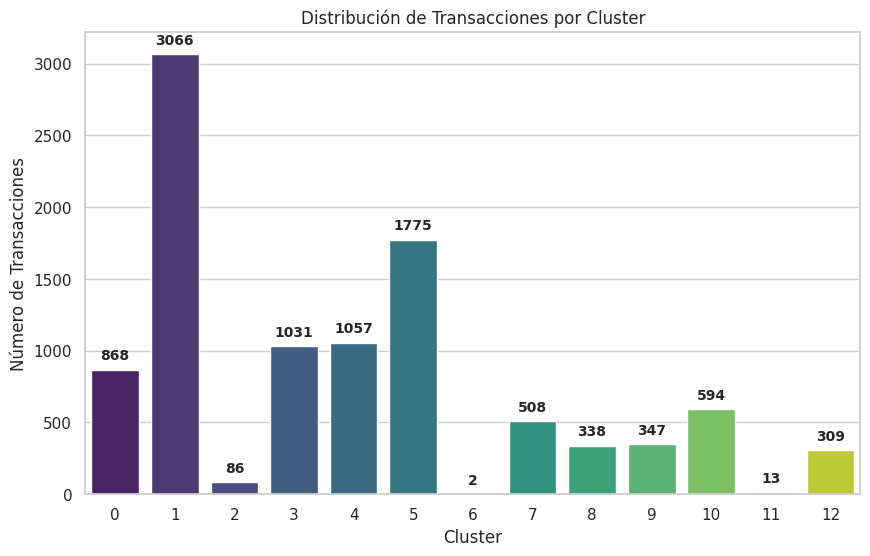

In [ ]:
# Número de transacciones por Cluster

cluster_counts = DATABASE['Cluster'].value_counts()

# Configuración de gráfica

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',
                fontsize=10, fontweight='bold')


plt.xlabel("Cluster")
plt.ylabel("Número de Transacciones")
plt.title("Distribución de Transacciones por Cluster")

plt.show()

**Identificación de los cluster más representativos a través de un análisis de Pareto:**

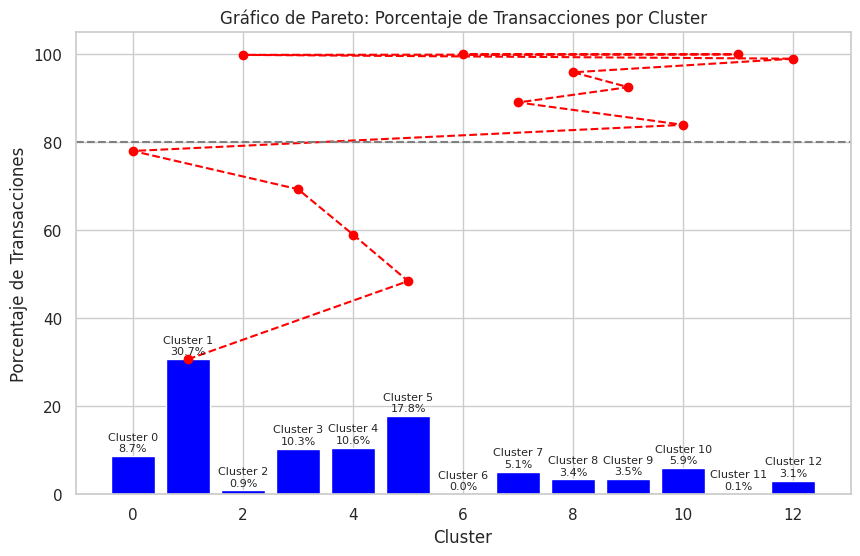

In [ ]:
 # Número total de transacciones

total_transactions = len(DATABASE)

# Número de transacciones por Cluster

cluster_counts = DATABASE['Cluster'].value_counts()

# Porcentaje de transacciones por cluster

cluster_percentages = cluster_counts / total_transactions * 100

# Ordenar los clusters en orden descendente

sorted_clusters = cluster_percentages.sort_values(ascending=False)

# Cálculo del porcentaje acumulado de transacciones

cumulative_percentages = sorted_clusters.cumsum()

# Configuración del gr+afico de Pareto

plt.figure(figsize=(10, 6))
ax1 = plt.bar(sorted_clusters.index, sorted_clusters, color='blue')
ax2 = plt.plot(sorted_clusters.index, cumulative_percentages, color='red', marker='o', linestyle='--')

# Establecer el límite del 80% del total de transacciones

plt.axhline(y=80, color='gray', linestyle='--')

# Etiquetar los clusters en el eje x con el número de cluster y el porcentaje de transacciones

for i, (cluster, percentage) in enumerate(zip(sorted_clusters.index, sorted_clusters)):
    plt.text(cluster, percentage + 1, f'Cluster {cluster}\n{percentage:.1f}%', ha='center', fontsize=8)


plt.xlabel('Cluster')
plt.ylabel('Porcentaje de Transacciones')
plt.title('Gráfico de Pareto: Porcentaje de Transacciones por Cluster')

plt.show()

**Obtención del TOP 3 de características más comunes de los clusters más representativos:**

In [ ]:
# Aplicación de filtro

selected_clusters = [1, 5, 4, 3, 0]
filtered_data = DATABASE[DATABASE['Cluster'].isin(selected_clusters)]

# Calcular la frecuencia de cada característica para cada cluster

cluster_frequencies = filtered_data.groupby('Cluster').apply(lambda x: x.iloc[:, 1:-1].stack().value_counts().head(3))

# Resultados

table = pd.DataFrame(cluster_frequencies).reset_index().rename(columns={'level_1': 'Característica', 0: 'Frecuencia'})

print(table)

    Cluster   Característica  Frecuencia
0         0         Consumer         868
1         0       Technology         868
2         0    New York City          78
3         1  Office Supplies        3066
4         1         Consumer        3066
5         1    New York City         299
6         3         Consumer        1031
7         3        Furniture        1031
8         3    New York City          95
9         4      Home Office        1057
10        4  Office Supplies        1057
11        4    New York City          89
12        5  Office Supplies        1775
13        5        Corporate        1775
14        5    New York City         150


## Fase IV: Insights

De los resultados obtenidos tras la implementación del modelo es posible determinar lo siguiente:


1.   El Cluster 0 está dominado por clientes del segmento "Consumer" y principalmente realiza compras en la categoría de "Technology".
2.   El Cluster 1 también tiene una presencia significativa de clientes del segmento "Consumer" y realiza compras en la categoría de "Office Supplies".
3.   El Cluster 3 tiene una combinación de clientes del segmento "Consumer" y "Furniture".
4.   El Cluster 4 está compuesto principalmente por clientes que realizan compras en la categoría de "Home Office" y "Office Supplies".
5.   El Cluster 5 está dominado por clientes que realizan compras en la categoría de "Office Supplies" y pertenecen al segmento "Corporate".


Así mismo, es posible determinar que los clientes de todos los cluster están concentrados en New York City.






De manera general, el análisis de las características más presentes en cada cluster permite inferir que el segmento de clientes "Consumer" es prominente en múltiples clusters, lo que sugiere que es un segmento importante en términos de transacciones. Esto indica que la tienda minorista tiene una base sólida de clientes individuales que contribuyen significativamente a las ventas.

Por último, la presencia de diferentes segmentos y categorías en cada cluster indica una diversidad en las preferencias de los clientes. Esto resalta la importancia de comprender las necesidades y preferencias específicas de cada segmento de clientes para adaptar las estrategias de marketing y ofrecer una experiencia personalizada.